# Author: Mehirban Ali
Date: 1 Jan 2026

# **Work Scope**
To clean the dataset, perform exploratory analysis, apply basic statistical tests, and summarize insights.

# About Dataset
By [Hala Alotaibi](https://www.kaggle.com/halaturkialotaibi) \
Saudi Arabia Food Delivery Data (2022-2025)\
This synthetic dataset contains records of food delivery orders in Saudi Arabia from 2022 to 2025

# Features Description
Order Number – A unique identifier for each order.

Order Date and Time – The timestamp indicating when the order was placed. 

Order_City – The city where the order was placed. 

Restaurant Type – The category of the restaurant (e.g., fast food). 

Total Bill (in Saudi Riyals) – The total amount paid for the order, providing financial insights. 

Delivery Duration (in minutes) – The time taken for the order to be delivered.

Customer Rating (from 1 to 5 stars) – Customer feedback on the order, indicating satisfaction levels.


**Questions to be Answered:**


**`Question No 01:`** What is the average total bill (in Saudi Riyals) for all orders?

**`Question No 02:`** What is the average delivery duration for orders across different cities?

**`Question No 03:`** Which city has the highest average customer rating?

**`Question No 04:`** What is the most popular restaurant type based on the number of orders?

**`Question No 05:`** How does the average customer rating differ between restaurant types?
**`Question No 06:`** What is the correlation between the total bill and the delivery duration?

**`Question No 07:`** What is the total revenue (sum of total bills) generated for each restaurant type?

**`Question No 08:`** How does the delivery duration vary by time of day (Order Time)?

**`Question No 09:`** What is the average delivery duration for each customer rating group?

**`Question No 10:`** What is the most frequent customer rating given (mode of ratings) for each city?


In [48]:
# Import Liberaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [49]:
# Load Dtaset
data = pd.read_csv('FoodDelivery_Saudi_2022-2025.csv')
# Having a look at  First 7 Rows of the dataset
data.head(7)

,Order Number,Order Date and Time,Order_City,Restaurant Type,Total Bill (in Saudi Riyals),Delivery Duration (in minutes),Customer Rating (from 1 to 5 stars)
0,203,1/18/2025 12:17,Jeddah,Sweets,252.73,15,3
1,204,5/12/2023 19:40,Buraidah,Barbecue,535.70,7,4
2,205,5/10/2023 7:47,Hail,Coffee,395.11,14,4
3,206,4/3/2023 23:39,Abha,Fast Food,698.11,5,5
4,207,12/21/2024 13:30,Buraidah,Coffee,499.87,8,5
5,208,10/21/2023 7:49,Jeddah,Sushi,369.38,19,3
6,209,2/18/2022 6:55,Dammam,Sushi,57.05,9,3


In [50]:
# Having a look at  Last 7 Rows of the dataset
data.tail(7)


,Order Number,Order Date and Time,Order_City,Restaurant Type,Total Bill (in Saudi Riyals),Delivery Duration (in minutes),Customer Rating (from 1 to 5 stars)
9993,10196,2/11/2024 0:04,Dammam,Sushi,446.73,13,1
9994,10197,11/28/2024 1:29,Jeddah,Indian Cuisine,683.01,19,4
9995,10198,7/12/2024 11:08,Dammam,Coffee,232.37,9,2
9996,10199,10/24/2023 10:05,Abha,Barbecue,79.02,16,2
9997,10200,5/20/2024 10:45,Mecca,Indian Cuisine,73.40,4,4
9998,10201,1/23/2025 2:28,Dammam,Italian Cuisine,580.04,7,2
9999,10202,4/8/2022 20:19,Buraidah,Sushi,215.03,12,2


In [51]:
# Having a look at the dataset structure , data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Order Number                         10000 non-null  int64  
 1   Order Date and Time                  10000 non-null  object 
 2   Order_City                           10000 non-null  object 
 3   Restaurant Type                      10000 non-null  object 
 4   Total Bill (in Saudi Riyals)         10000 non-null  float64
 5   Delivery Duration (in minutes)       10000 non-null  int64  
 6   Customer Rating (from 1 to 5 stars)  10000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 547.0+ KB


data.info() gives us a concise summary of the dataset. We can see that there are 10,000 entries and 7 columns. We can clearly see the names of the columns, their datatypes, and the number of non-null entries in each column. We conclude that there are no missing values in the data set . One another observation is that the 'Order Date and Time' column is of object datatype, which means we will need to convert it to datetime format for any time-based analysis.

In [52]:
# converting 'Order Date and Time' column to datetime format
data['Order Date and Time'] = pd.to_datetime(data['Order Date and Time'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Order Number                         10000 non-null  int64         
 1   Order Date and Time                  10000 non-null  datetime64[ns]
 2   Order_City                           10000 non-null  object        
 3   Restaurant Type                      10000 non-null  object        
 4   Total Bill (in Saudi Riyals)         10000 non-null  float64       
 5   Delivery Duration (in minutes)       10000 non-null  int64         
 6   Customer Rating (from 1 to 5 stars)  10000 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3), object(2)
memory usage: 547.0+ KB


Now we can clearly see that the datatype of 'Order Date and Time' column is datetime64[ns], which is suitable for time-based analysis.

In [53]:
# we will divide the ''Order Date and Time'' column in to 'Order Date' and 'Order Time' column for better analysis.
data['Order Date'] = data['Order Date and Time'].dt.date
data['Order Time'] = data['Order Date and Time'].dt.time

In [54]:
data.head()

,Order Number,Order Date and Time,Order_City,Restaurant Type,Total Bill (in Saudi Riyals),Delivery Duration (in minutes),Customer Rating (from 1 to 5 stars),Order Date,Order Time
0,203,2025-01-18 12:17:00,Jeddah,Sweets,252.73,15,3,2025-01-18,12:17:00
1,204,2023-05-12 19:40:00,Buraidah,Barbecue,535.70,7,4,2023-05-12,19:40:00
2,205,2023-05-10 07:47:00,Hail,Coffee,395.11,14,4,2023-05-10,07:47:00
3,206,2023-04-03 23:39:00,Abha,Fast Food,698.11,5,5,2023-04-03,23:39:00
4,207,2024-12-21 13:30:00,Buraidah,Coffee,499.87,8,5,2024-12-21,13:30:00


In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Order Number                         10000 non-null  int64         
 1   Order Date and Time                  10000 non-null  datetime64[ns]
 2   Order_City                           10000 non-null  object        
 3   Restaurant Type                      10000 non-null  object        
 4   Total Bill (in Saudi Riyals)         10000 non-null  float64       
 5   Delivery Duration (in minutes)       10000 non-null  int64         
 6   Customer Rating (from 1 to 5 stars)  10000 non-null  int64         
 7   Order Date                           10000 non-null  object        
 8   Order Time                           10000 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(4)
memory usage: 703.3+ KB


In [56]:
# now we will change the datatype of "Order Date" to datetime format.
data['Order Date'] = data['Order Date and Time'].dt.normalize()

In [57]:
# now we will change the datatype of  'Order Time' columns to datetime format.
data['Order Time'] = data['Order Date and Time'].dt.time
data['Order Time'].unique()

array([datetime.time(12, 17), datetime.time(19, 40), datetime.time(7, 47),
       ..., datetime.time(9, 25), datetime.time(10, 44),
       datetime.time(17, 40)], shape=(1440,), dtype=object)

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Order Number                         10000 non-null  int64         
 1   Order Date and Time                  10000 non-null  datetime64[ns]
 2   Order_City                           10000 non-null  object        
 3   Restaurant Type                      10000 non-null  object        
 4   Total Bill (in Saudi Riyals)         10000 non-null  float64       
 5   Delivery Duration (in minutes)       10000 non-null  int64         
 6   Customer Rating (from 1 to 5 stars)  10000 non-null  int64         
 7   Order Date                           10000 non-null  datetime64[ns]
 8   Order Time                           10000 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(3)
memory usage: 703.3+ KB


In [59]:
# Now we  will display both original and time-only columns
data[['Order Date and Time', 'Order Time']].head(5)


,Order Date and Time,Order Time
0,2025-01-18 12:17:00,12:17:00
1,2023-05-12 19:40:00,19:40:00
2,2023-05-10 07:47:00,07:47:00
3,2023-04-03 23:39:00,23:39:00
4,2024-12-21 13:30:00,13:30:00


In [60]:
# to check the unique values in the 'Restaurant Type' column
data['Restaurant Type'].unique()

array(['Sweets', 'Barbecue', 'Coffee', 'Fast Food', 'Sushi',
       'Vegetarian/Vegan', 'Indian Cuisine', 'Seafood', 'Italian Cuisine',
       'Pizzeria', 'Burger', 'Bakeries'], dtype=object)

 We can conclude that there are 12 unique restraunt types in the dataset.

In [61]:
# Having a look at the statistical summary of the dataset
data.describe()

,Order Number,Order Date and Time,Total Bill (in Saudi Riyals),Delivery Duration (in minutes),Customer Rating (from 1 to 5 stars),Order Date
count,10000.00000,10000,10000.000000,10000.000000,10000.000000,10000
mean,5202.50000,2023-07-22 05:24:22.746000128,423.664271,11.946700,2.991300,2023-07-21 17:22:16.320000
min,203.00000,2022-01-01 05:45:00,36.040000,4.000000,1.000000,2022-01-01 00:00:00
25%,2702.75000,2022-10-13 22:08:45,232.060000,8.000000,2.000000,2022-10-13 00:00:00
50%,5202.50000,2023-07-29 15:37:30,428.385000,12.000000,3.000000,2023-07-29 00:00:00
75%,7702.25000,2024-04-30 08:19:00,616.887500,16.000000,4.000000,2024-04-30 00:00:00
max,10202.00000,2025-01-31 23:56:00,799.980000,20.000000,5.000000,2025-01-31 00:00:00
std,2886.89568,NaN,222.786720,4.625754,1.219333,NaN


In [62]:
data.head()

,Order Number,Order Date and Time,Order_City,Restaurant Type,Total Bill (in Saudi Riyals),Delivery Duration (in minutes),Customer Rating (from 1 to 5 stars),Order Date,Order Time
0,203,2025-01-18 12:17:00,Jeddah,Sweets,252.73,15,3,2025-01-18,12:17:00
1,204,2023-05-12 19:40:00,Buraidah,Barbecue,535.70,7,4,2023-05-12,19:40:00
2,205,2023-05-10 07:47:00,Hail,Coffee,395.11,14,4,2023-05-10,07:47:00
3,206,2023-04-03 23:39:00,Abha,Fast Food,698.11,5,5,2023-04-03,23:39:00
4,207,2024-12-21 13:30:00,Buraidah,Coffee,499.87,8,5,2024-12-21,13:30:00


In [63]:
data['Order_City'].unique()

array(['Jeddah', 'Buraidah', 'Hail', 'Abha', 'Dammam', 'Tabuk', 'Khobar',
       'Medina', 'Riyadh', 'Mecca'], dtype=object)

# **Statistical Tests and Summary Insights**

# T-test

In [64]:
# now we will apply T-test to check if there is a significant difference in the average delivery time between different restaurant types.
# Compare the average Delivery Duration for two cities 'Jeddah' and 'Riyadh'
from scipy import stats
# Group the data by 'Order_City' 
city_a = data[data['Order_City'] == 'Jeddah']['Delivery Duration (in minutes)']
city_b = data[data['Order_City'] == 'Riyadh']['Delivery Duration (in minutes)']

# Perform T-test to compare means
t_stat, p_value = stats.ttest_ind(city_a,city_b)
print(f"T-statistic: {t_stat}, P-value: {p_value}")





T-statistic: 0.0002084624772816779, P-value: 0.9998336920194948


# Conclusions Of T-test (on cities 'Jeddah' and 'Riyadh' )
* A P-value of 0.9998 is extremely high (far greater than the typical significance level threshold of 0.05 or 0.01).This means that there is no statistically significant difference between the two groups you're comparing (e.g., delivery duration between two cities, 'Jeddah' and 'Riyadh').
* The T-statistic value of 0.000208 is very close to zero, suggesting that the means of the two groups being compared are nearly identical. The closer the T-statistic is to zero, the smaller the difference between the groups.

# NOVA Test 
we will compare average Total Bill across different Restaurant Types.

In [65]:
# We will perform ANOVA test to compare Total Bill by Restaurant Type
restaurant_types = data['Restaurant Type'].unique()
total_bill_groups = [data[data['Restaurant Type'] == r]['Total Bill (in Saudi Riyals)'] for r in restaurant_types]

# Perform ANOVA test
anova_result = stats.f_oneway(*total_bill_groups)
print(f"ANOVA Result: F-statistic = {anova_result.statistic}, P-value = {anova_result.pvalue}")

ANOVA Result: F-statistic = 1.4382051903090889, P-value = 0.14814444059383297


# Conclusion:

* F-statistic = 1.44 indicates that there is some variability between the group means, but it is not large enough to suggest significant differences.

* P-value = 0.148 indicates that there is no statistically significant difference between the means of the groups at the 0.05 significance level.

Thus, we fail to reject the null hypothesis and conclude that the different restaurant types do not show significantly different total bills based on this ANOVA test.

# Chi-Square Test
We will check the relationship between Customer Rating (as a categorical variable) and Restaurant Type.

In [66]:
# we will first group the Customer Rating into categories (e.g., 1-2, 3, 4-5), then perform the Chi-Square test.
# categories customer ratings into groups
data['Customer rating group'] = pd.cut(data['Customer Rating (from 1 to 5 stars)'], bins=[0, 2, 4, 5], labels=['Low', 'Medium', 'High'])

# create a contingency table between Restaurant Type and Customer rating group
contingency_table = pd.crosstab(data['Restaurant Type'],data['Customer rating group'])

# perform chi-square test
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
print(f"chi2: {chi2}, P-value: {p}")





chi2: 11.888422590888172, P-value: 0.9596406741630831


In [67]:
data.columns

Index(['Order Number', 'Order Date and Time', 'Order_City', 'Restaurant Type',
       'Total Bill (in Saudi Riyals)', 'Delivery Duration (in minutes)',
       'Customer Rating (from 1 to 5 stars)', 'Order Date', 'Order Time',
       'Customer rating group'],
      dtype='object')

# Visualizing the Results

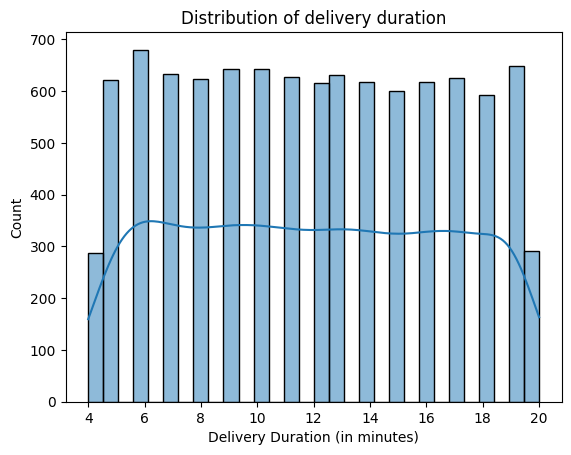

In [68]:
# distribution of delovery duration
sns.histplot(data['Delivery Duration (in minutes)'], bins=30, kde=True)
plt.title('Distribution of delivery duration')
plt.show()

In [69]:
data.columns

Index(['Order Number', 'Order Date and Time', 'Order_City', 'Restaurant Type',
       'Total Bill (in Saudi Riyals)', 'Delivery Duration (in minutes)',
       'Customer Rating (from 1 to 5 stars)', 'Order Date', 'Order Time',
       'Customer rating group'],
      dtype='object')

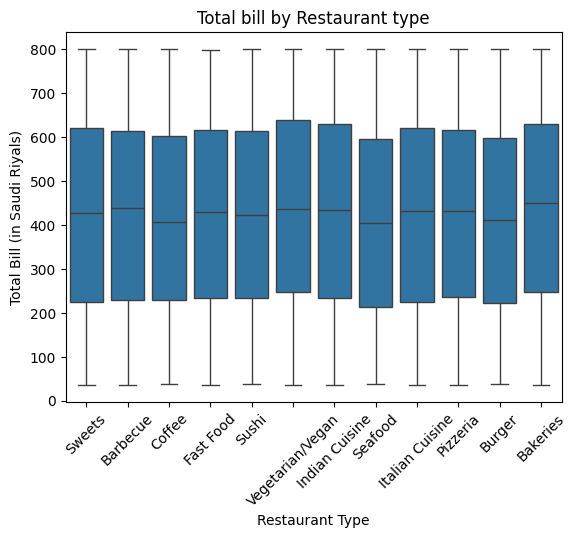

In [70]:
# Box plot for total bill and restaurant type
sns.boxplot(x='Restaurant Type', y='Total Bill (in Saudi Riyals)', data=data)
plt.title('Total bill by Restaurant type')
plt.xticks(rotation=45)
plt.show()

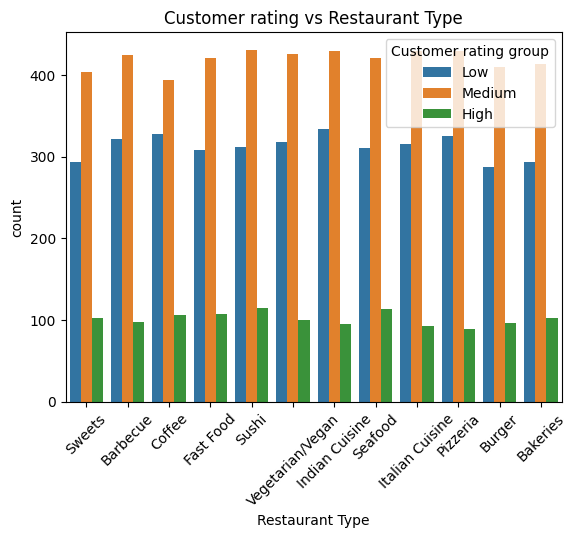

In [71]:
# customer rating vs Restaurant Type (countplot)
sns.countplot(x='Restaurant Type', hue='Customer rating group', data=data)
plt.title('Customer rating vs Restaurant Type')
plt.xticks(rotation=45)
plt.show()

<div style="background-color:#D0E6F3; padding: 15px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #66C2A5; margin-top: 15px;">
    <h1 style="font-size:24px; font-family:Georgia, serif; color:#000000; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);">
        4. Data Analysis
    </h1>
</div>


<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 1: What is the average total bill (in Saudi Riyals) for all orders?
    </h2>
</div>


In [72]:
# the average total bill (in Saudi Riyals) for all orders
average_total_bill=data['Total Bill (in Saudi Riyals)'].mean()
# Print the result
print(f"The average total bill for all orders is: {average_total_bill} Saudi Riyals")

The average total bill for all orders is: 423.664271 Saudi Riyals


<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 1: What is the average delivery duration for orders across different cities?
    </h2>
</div>


In [73]:
# Group by 'Order_City' and calculate the mean of 'Delivery Duration (in minutes)' for each city
average_delivery_duration_by_city = data.groupby('Order_City')['Delivery Duration (in minutes)'].mean()

# Print the result
print(average_delivery_duration_by_city)

Order_City
Abha        11.901705
Buraidah    11.957073
Dammam      11.892617
Hail        11.980020
Jeddah      12.137830
Khobar      11.611702
Mecca       11.849151
Medina      12.034343
Riyadh      12.137787
Tabuk       11.951076
Name: Delivery Duration (in minutes), dtype: float64


In [74]:
city_with_highest_average_delivery_duration = average_delivery_duration_by_city.idxmax()
average_delivery_duration_by_city =  average_delivery_duration_by_city.max()
print(f"The city with the highest average delivery duration is: {city_with_highest_average_delivery_duration} with the highest average delivery duration of: {average_delivery_duration_by_city} minutes")

The city with the highest average delivery duration is: Jeddah with the highest average delivery duration of: 12.137829912023461 minutes


<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 1: Which city has the highest average customer rating?
    </h2>
</div>

In [75]:
# Group by 'Order_City' and calculate the mean of 'Customer Rating (from 1 to 5 stars)' for each city
average_customer_rating_by_city = data.groupby('Order_City')['Customer Rating (from 1 to 5 stars)'].mean()
average_customer_rating_by_city

Order_City
Abha        2.901705
Buraidah    3.023415
Dammam      3.056568
Hail        2.942058
Jeddah      2.982405
Khobar      3.023404
Mecca       3.006993
Medina      2.981818
Riyadh      3.017745
Tabuk       2.976517
Name: Customer Rating (from 1 to 5 stars), dtype: float64

In [76]:
# Find the city with the highest average customer rating
highest_rated_city = average_customer_rating_by_city.idxmax()
highest_rating = average_customer_rating_by_city.max()

# Print the result
print(f"The city with the highest average customer rating is {highest_rated_city} with an average rating of {highest_rating:.2f}.")

The city with the highest average customer rating is Dammam with an average rating of 3.06.


<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 4: What is the most popular restaurant type based on the number of orders?
    </h2>
</div>

In [77]:
# Group by 'Restaurant Type' and count the number of orders for each type
order_count_by_restaurant_type = data.groupby('Restaurant Type')['Order Number'].count()
order_count_by_restaurant_type

Restaurant Type
Bakeries            810
Barbecue            844
Burger              795
Coffee              828
Fast Food           837
Indian Cuisine      859
Italian Cuisine     838
Pizzeria            843
Seafood             845
Sushi               858
Sweets              799
Vegetarian/Vegan    844
Name: Order Number, dtype: int64

In [78]:
# Find the restaurant type with the highest number of orders
most_popular_restaurant_type = order_count_by_restaurant_type.idxmax()
most_orders = order_count_by_restaurant_type.max()

# Print the result
print(f"The most popular restaurant type based on the number of orders is {most_popular_restaurant_type} with {most_orders} orders.")

The most popular restaurant type based on the number of orders is Indian Cuisine with 859 orders.


**Interpretation:**

- **Indian Cuisine** stands out as the most popular restaurant type based on the number of orders, which could be an indicator of high customer demand or preference for this type of cuisine.

- The high number of orders suggests that customers are likely frequenting Indian restaurants more often compared to other types of restaurants.

<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 5: How does the average customer rating differ between restaurant types?
    </h2>
</div>

In [79]:
# Group by 'Restaurant Type' and calculate the mean of 'Customer Rating (from 1 to 5 stars)'
average_customer_rating_by_restaurant_type = data.groupby('Restaurant Type')['Customer Rating (from 1 to 5 stars)'].mean()

# Print the result
print(average_customer_rating_by_restaurant_type)

Restaurant Type
Bakeries            3.016049
Barbecue            2.997630
Burger              3.028931
Coffee              2.954106
Fast Food           3.031063
Indian Cuisine      2.945285
Italian Cuisine     2.974940
Pizzeria            2.964413
Seafood             3.021302
Sushi               2.996503
Sweets              3.020025
Vegetarian/Vegan    2.950237
Name: Customer Rating (from 1 to 5 stars), dtype: float64


In [80]:
highest_average_customer_rating_for_restaurant_type = average_customer_rating_by_restaurant_type.idxmax()
highest_average_customer_rating_by_restaurant_type = average_customer_rating_by_restaurant_type.max()
print(f"The restaurant type with the highest average customer rating is {highest_average_customer_rating_for_restaurant_type} with an average rating of {highest_average_customer_rating_by_restaurant_type:.2f}.")

The restaurant type with the highest average customer rating is Fast Food with an average rating of 3.03.


**Key Insights:**

- Restaurant Type: Fast Food

- Average Customer Rating: 3.03

**Context and Interpretation:**

- Fast Food restaurants seem to have a slightly higher average customer rating compared to other restaurant types, which suggests that customers generally rate Fast Food establishments more favorably.

- The average rating of 3.03 is just above 3.0, which could be interpreted as a neutral to slightly positive customer sentiment.

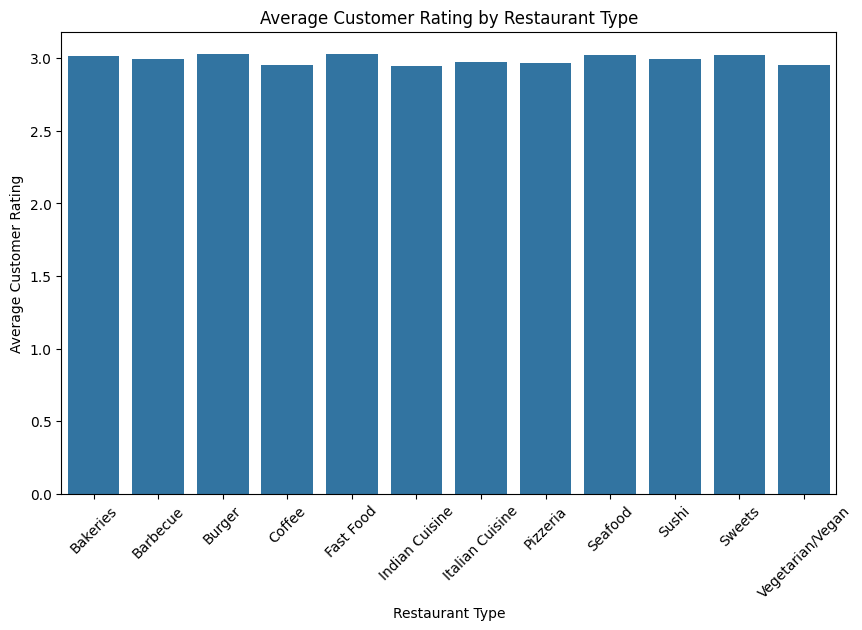

In [81]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the average customer rating by restaurant type
plt.figure(figsize=(10, 6))
sns.barplot(x=average_customer_rating_by_restaurant_type.index, y=average_customer_rating_by_restaurant_type.values)

# Set labels and title
plt.xlabel('Restaurant Type')
plt.ylabel('Average Customer Rating')
plt.title('Average Customer Rating by Restaurant Type')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 6: What is the correlation between the total bill and the delivery duration?
    </h2>
</div>

In [82]:
# Calculate the Pearson correlation between 'Total Bill (in Saudi Riyals)' and 'Delivery Duration (in minutes)'
correlation = data[['Total Bill (in Saudi Riyals)', 'Delivery Duration (in minutes)']].corr()

# Print the correlation matrix
print(correlation)

                                Total Bill (in Saudi Riyals)  \
Total Bill (in Saudi Riyals)                        1.000000   
Delivery Duration (in minutes)                     -0.005361   

                                Delivery Duration (in minutes)  
Total Bill (in Saudi Riyals)                         -0.005361  
Delivery Duration (in minutes)                        1.000000  


**Correlation Value:**

- The correlation coefficient between Total Bill (in Saudi Riyals) and Delivery Duration (in minutes) is -0.005361, which is very close to 0.

- A correlation of -0.005 indicates that there is very little to no correlation between total bill and delivery duration. In other words, the amount of the bill does not significantly affect how long it takes for the delivery to occur.

- This small negative correlation suggests a slight inverse relationship (but it's too weak to be meaningful). As one increases, the other might decrease slightly, but the relationship is negligible.

**Conclusion:**

- **Minimal Relationship:** The small negative correlation indicates that the total bill and delivery duration don't have a strong relationship.

- **Insights for Business:** In terms of business strategy, it suggests that the total cost of the order (i.e., the bill amount) doesn't significantly impact how long it takes for deliveries to be completed. Delivery times might depend on other factors, such as the delivery location, traffic, or restaurant preparation time, rather than the bill size.

<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 7: What is the total revenue (sum of total bills) generated for each restaurant type?
    </h2>
</div>

In [83]:
# Group by 'Restaurant Type' and calculate the sum of 'Total Bill (in Saudi Riyals)' for each type
total_revenue_by_restaurant_type = data.groupby('Restaurant Type')['Total Bill (in Saudi Riyals)'].sum()

# Print the result
print(total_revenue_by_restaurant_type)

Restaurant Type
Bakeries            354265.47
Barbecue            359128.12
Burger              328865.18
Coffee              341051.64
Fast Food           352511.29
Indian Cuisine      369618.57
Italian Cuisine     356982.03
Pizzeria            360562.13
Seafood             345242.76
Sushi               361041.24
Sweets              337679.14
Vegetarian/Vegan    369695.14
Name: Total Bill (in Saudi Riyals), dtype: float64


**Key Insights:**

- **Highest Revenue:** The highest revenue comes from the Vegetarian/Vegan restaurant type, with 369,695.14 SAR, followed closely by Indian Cuisine (369,618.57 SAR).

- **Lowest Revenue:** The lowest revenue is from the Burger restaurant type, generating 328,865.18 SAR.

- **Revenue Distribution:** Restaurant types like Sushi, Pizzeria, and Barbecue are also generating a significant amount of revenue, with values close to or above 360,000 SAR.

<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 8: How does the delivery duration vary by time of day (Order Time)?
    </h2>
</div>

In [93]:
# Assuming the data is already loaded into 'data'
data['Order Date and Time'] = pd.to_datetime(data['Order Date and Time'], errors='coerce')

# Extract the 'Order Time' part (time only) from 'Order Date and Time'
data['Order Time'] = data['Order Date and Time'].dt.time

# Verify the dtype after conversion
print(data['Order Time'].dtype)  # It should show 'object', since time is a bit special in pandas.
print(data[['Order Date and Time', 'Order Time']].head())  # Verify the first few rows

object
  Order Date and Time Order Time
0 2025-01-18 12:17:00   12:17:00
1 2023-05-12 19:40:00   19:40:00
2 2023-05-10 07:47:00   07:47:00
3 2023-04-03 23:39:00   23:39:00
4 2024-12-21 13:30:00   13:30:00


In [ ]:
# Step 1: Extract the hour of the day from 'Order Date and Time'
data['Order Hour'] = data['Order Date and Time'].dt.hour

data['Order Hour']

In [ ]:
# Step 2: Group by 'Order Hour' and calculate the average 'Delivery Duration (in minutes)'
average_delivery_duration_by_hour = data.groupby('Order Hour')['Delivery Duration (in minutes)'].mean()

In [ ]:
# Step 3: Print the result
print(average_delivery_duration_by_hour)

Order Hour
0     12.067916
1     11.933498
2     11.535980
3     12.287469
4     11.970874
5     11.612150
6     12.209790
7     11.845606
8     12.132212
9     11.865385
10    11.992754
11    11.876607
12    11.817330
13    12.271053
14    11.833713
15    11.809412
16    12.380556
17    12.015730
18    12.049661
19    12.004717
20    11.878440
21    11.668305
22    12.126521
23    11.625287
Name: Delivery Duration (in minutes), dtype: float64


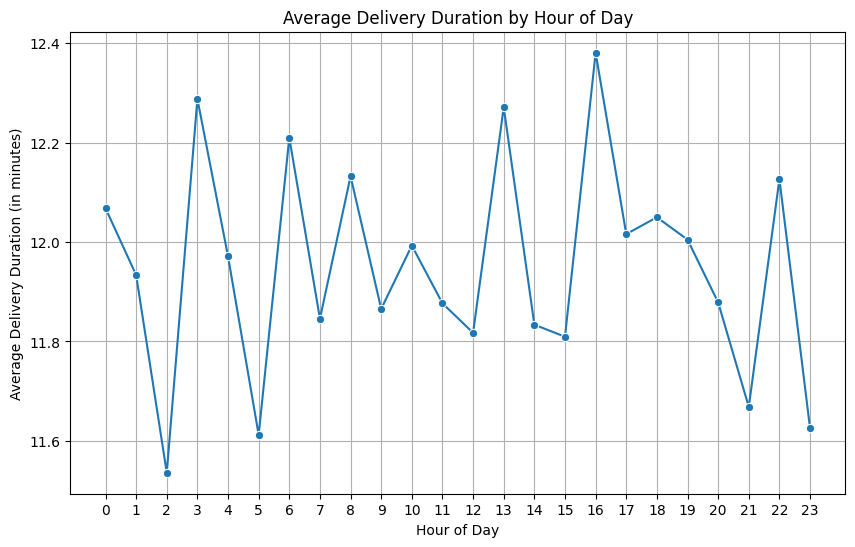

In [99]:
# Step 5: Visualize the data
plt.figure(figsize=(10, 6))
sns.lineplot(x=average_delivery_duration_by_hour.index, y=average_delivery_duration_by_hour.values, marker='o')

# Set labels and title
plt.xlabel('Hour of Day')
plt.ylabel('Average Delivery Duration (in minutes)')
plt.title('Average Delivery Duration by Hour of Day')
plt.xticks(range(0, 24))  # Ensure all hours from 0 to 23 are labeled
plt.grid(True)
plt.show()

**Potential Conclusions:**

**Early Morning & Late Evening:** The delivery duration tends to be longer around early morning and late evening.

**Mid-day:** The delivery time may be relatively faster in the middle of the day.

**High Traffic Periods:** The high delivery durations around certain hours might be due to traffic congestion, order volume, or other factors like staff availability.

<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 9: What is the average delivery duration for each customer rating group?
    </h2>
</div>

In [103]:
# Group by 'Customer rating group' and calculate the average 'Delivery Duration (in minutes)'
average_delivery_by_rating_group = data.groupby('Customer rating group')['Delivery Duration (in minutes)'].mean()

# Print the result
print(average_delivery_by_rating_group)

Customer rating group
Low       11.902615
Medium    12.047685
High      11.665299
Name: Delivery Duration (in minutes), dtype: float64


C:\Users\Mehirban Ali\AppData\Local\Temp\ipykernel_11248\2364760061.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  average_delivery_by_rating_group = data.groupby('Customer rating group')['Delivery Duration (in minutes)'].mean()


**Key Insights:**

- Medium rating group has the highest average delivery duration (12.05 minutes).

- High rating group has the shortest average delivery duration (11.67 minutes).

- Low rating group has an average delivery duration of 11.90 minutes, which is between the other two.

**Possible Interpretation:**

- The customer rating group might have an indirect relationship with the delivery time. For example:

 - **High-rated customers** could be associated with faster delivery times due to higher priority or more efficient processing.

 - **Medium-rated customers** could experience slightly longer delivery times, possibly because they fall in a middle range where factors like order volume and delivery efficiency vary.

 - **Low-rated** customers may have delivery times similar to high-rated ones, but this can depend on other factors like order size, time of day, or geographic location.

<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        Question 10: What is the most frequent customer rating given (mode of ratings) for each city?
    </h2>
</div>

In [104]:
# Group by 'Order_City' and find the mode of 'Customer Rating (from 1 to 5 stars)' for each city
mode_customer_rating_per_city = data.groupby('Order_City')['Customer Rating (from 1 to 5 stars)'].agg(lambda x: x.mode()[0])

# Print the result
print(mode_customer_rating_per_city)

Order_City
Abha        2
Buraidah    4
Dammam      4
Hail        3
Jeddah      3
Khobar      4
Mecca       3
Medina      2
Riyadh      3
Tabuk       2
Name: Customer Rating (from 1 to 5 stars), dtype: int64


<div style="background-color:#D0E6F3; padding: 15px; border-radius: 10px; box-shadow: 0 2px 4px 0 rgba(0, 0, 0, 0.1); border:2px solid #66C2A5; margin-top: 15px;">
    <h1 style="font-size:24px; font-family:Georgia, serif; color:#000000; text-align: center; text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.2);">
        5. Conclusion
    </h1>
</div>


<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        5.2 Suggestions
    </h2>
</div>



<div style="background-color:#E6F2FF; padding: 10px; border-radius: 8px; box-shadow: 0 1px 3px 0 rgba(0, 0, 0, 0.1); border:1px solid #66C2A5; margin-top: 10px; margin-left: 20px;">
    <h2 style="font-size:20px; font-family:Georgia, serif; color:#333333; text-align: left; margin: 0;">
        5.3 Possible Next Steps
    </h2>
</div>

